In [37]:
import numpy as np
import matplotlib.pyplot as plt
import os
import scipy.io
import imageio
import wignerDistribution as wd

In [8]:
def loadMatFile(file_path, file_name, key):
    """
    Load a mat file and return an item of the dictionary loaded.
    """    
    # read mat file dictionary
    dictionary = scipy.io.loadmat(file_path + file_name)
    
    # access item of a dictionary
    array = dictionary[key]
    
    return array

In [9]:
path = os.getcwd()
file_name = 'hDataset.mat'

file_path = path + '\\output\\dataset\\'
file_name = 'hDataset.mat'
key = 'hDataset'

dataset = loadMatFile(file_path, file_name, key)
print(dataset.shape)
print(type(dataset[0,0,0]))

(200, 200, 500)
<class 'numpy.complex128'>


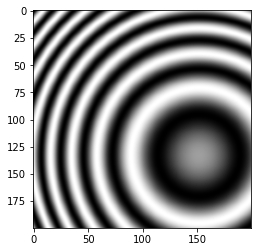

In [40]:
img = np.zeros((200, 200))
img = dataset[:,:, 1]

plt.imshow(np.real(img), cmap = 'gray')
plt.show()

In [32]:
import imageio
import numpy
imA = numpy.real(img)
U = imA
#imA = imageio.imread("imageA.png")
U=numpy.array(imA[:,:,0],dtype=numpy.float64)

In [33]:
os.getcwd()

'C:\\Users\\flucasamar\\Desktop\\Github\\computerGeneratedHolography'

In [34]:
from TfdImage import *
from numpy.fft import fft2, ifft2, fftshift, ifftshift

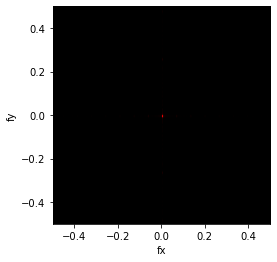

In [35]:
V=fft2(U)
VC = fftshift(V)
P = numpy.power(numpy.absolute(VC),2)
img = matriceImage(P,2.0,[1.0,0.0,0.0])
plotSpectre(img,200.0,100.0)

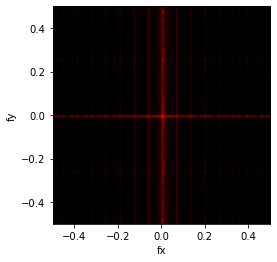

In [36]:
img = matriceImageLog(P,[1.0,0.0,0.0])
plotSpectre(img,200.0,100.0)

In [38]:
def calculate_1D_wigner_distribution(dataset, n, seq_legth, angle):
    """
    Calculates the  1D pseudo-Wigner distribution of the n first images (in gray levels) in the dataset. seq_length is the 
    length in pixels of the operating window and it has to be an odd number (9 is a common operative value). 
    The angle variable in degrees determines the spatial orientation of the distribution.
    """
    wd_results = []
    for i in range(n):
        test_image = dataset[:,:,i]
        wd_results.append(wd.wigner_distribution(test_image, seq_legth, angle))
    return wd_results

In [41]:
wd_results = wd.wigner_distribution(numpy.real(img), 9, 0)

calculating ...


In [42]:
wd_results.shape

(8, 200, 200)

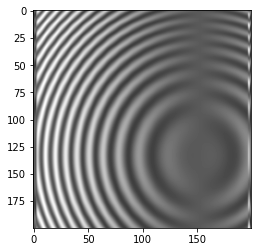

In [48]:
plt.imshow(wd_results[7,:,:], cmap = 'gray')